<a href="https://colab.research.google.com/github/Alenushka2013/Khpi_master_studing/blob/main/IDT_Lab_5__regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

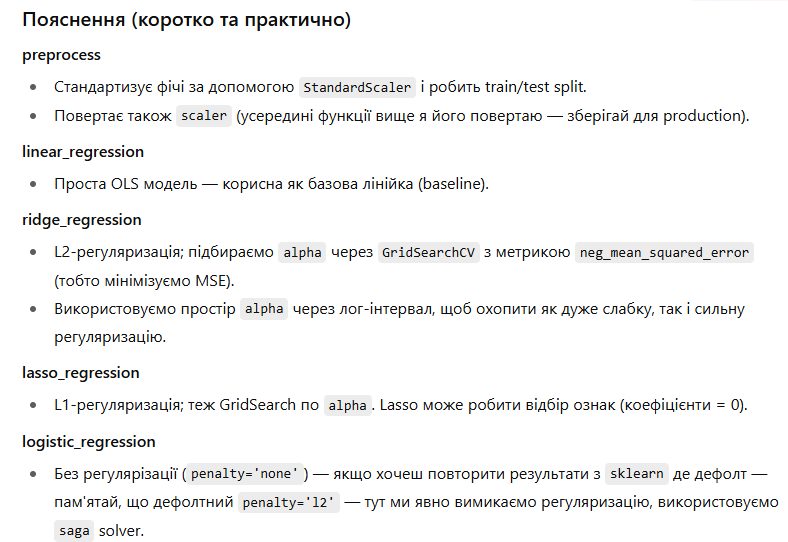

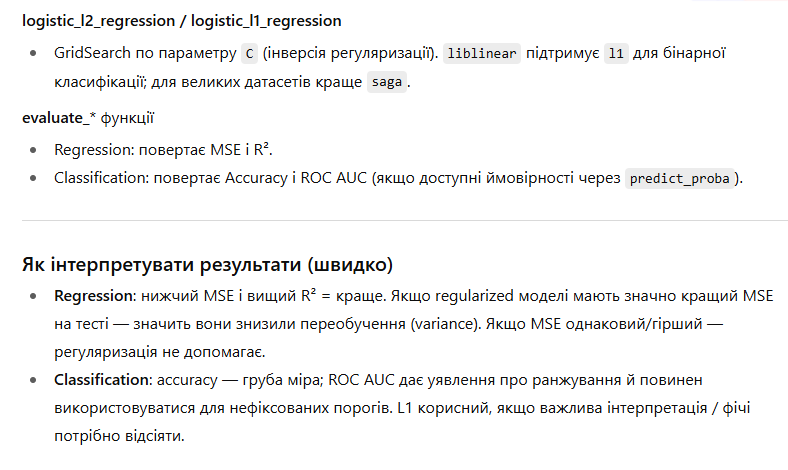

In [ ]:
# Please, compare and analyze results. Add conclusions as comments here or to a readme file.

import numpy as np
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer, load_diabetes


def preprocess(X: np.ndarray, y: np.ndarray) -> list[np.ndarray]:
    """
    Preprocesses the input data by scaling features and splitting into training and test sets.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.

    Returns:
        list[np.ndarray]: List containing training and test sets for features and target.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

    return [X_train, X_test, y_train, y_test]


def get_regression_data() -> list[np.ndarray]:
    """
    Loads and preprocesses the diabetes dataset for regression tasks.

    Returns:
        list[np.ndarray]: List containing training and test sets for features and target.
    """
    data = load_diabetes()
    X, y = data.data, data.target
    return preprocess(X, y)


def get_classification_data() -> list[np.ndarray]:
    """
    Loads and preprocesses the breast cancer dataset for classification tasks.

    Returns:
        list[np.ndarray]: List containing training and test sets for features and target.
    """
    data = load_breast_cancer()
    X, y = data.data, data.target
    return preprocess(X, y)


def linear_regression(X: np.ndarray, y: np.ndarray) -> BaseEstimator:
    """
    Trains a linear regression model on the given data.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.

    Returns:
        BaseEstimator: Trained linear regression model.
    """
    model = LinearRegression()
    model.fit(X, y)
    return model


def ridge_regression(X: np.ndarray, y: np.ndarray) -> BaseEstimator:
    """
    Trains a ridge regression model with hyperparameter tuning using GridSearchCV.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.

    Returns:
        BaseEstimator: Best ridge regression model found by GridSearchCV.
    """
    ridge = Ridge(random_state = 42, max_iter = 10000)
    param_grid = {'alpha': np.logspace(-6, 3, 20)}
    grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X, y)
    return grid.best_estimator_


def lasso_regression(X: np.ndarray, y: np.ndarray) -> BaseEstimator:
    """
    Trains a lasso regression model with hyperparameter tuning using GridSearchCV.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.

    Returns:
        BaseEstimator: Best lasso regression model found by GridSearchCV.
    """
    lasso = Lasso(random_state = 42, max_iter=10000)
    param_grid = {'alpha': np.logspace(-6, 1, 30), }
    grid = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X, y)
    return grid.best_estimator_


def logistic_regression(X: np.ndarray, y: np.ndarray) -> BaseEstimator:
    """
    Trains a logistic regression model without regularization on the given data.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.

    Returns:
        BaseEstimator: Trained logistic regression model.
    """
    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=20000, random_state = 42)
    model.fit(X, y)
    return model


def logistic_l2_regression(X: np.ndarray, y: np.ndarray) -> BaseEstimator:
    """
    Trains a logistic regression model with L2 regularization using GridSearchCV.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.

    Returns:
        BaseEstimator: Best logistic regression model with L2 regularization found by GridSearchCV.
    """
    model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=20000, random_state = 42)
    param_grid = {'C': np.logspace(-4, 4, 25)}
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X, y)
    return grid.best_estimator_


def logistic_l1_regression(X: np.ndarray, y: np.ndarray) -> BaseEstimator:
    """
    Trains a logistic regression model with L1 regularization using GridSearchCV.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.

    Returns:
        BaseEstimator: Best logistic regression model with L1 regularization found by GridSearchCV.
    """
    model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=20000, random_state = 42)
    param_grid = {'C': np.logspace(-4, 4, 25)}
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X, y)
    return grid.best_estimator_

In [ ]:
import pandas as pd
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, roc_auc_score

# -------------------------
# Evaluation helpers
# -------------------------
def evaluate_regression_full(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    return {
        'RMSE_train': root_mean_squared_error(y_train, y_pred_train),
        'RMSE_test': root_mean_squared_error(y_test, y_pred_test),
        'R2_train': r2_score(y_train, y_pred_train),
        'R2_test': r2_score(y_test, y_pred_test)
    }

def evaluate_classification_full(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    roc_train = roc_test = None
    if hasattr(model, "predict_proba"):
        try:
            y_proba_train = model.predict_proba(X_train)[:, 1]
            y_proba_test = model.predict_proba(X_test)[:, 1]
            roc_train = roc_auc_score(y_train, y_proba_train)
            roc_test = roc_auc_score(y_test, y_proba_test)
        except Exception:
            pass

    return {
        'Accuracy_train': acc_train,
        'Accuracy_test': acc_test,
        'ROC_AUC_train': roc_train,
        'ROC_AUC_test': roc_test
    }

# -------------------------
# Run evaluation and return DataFrames
# -------------------------
def run_all_models_df():
    # Regression
    X_train_r, X_test_r, y_train_r, y_test_r = get_regression_data()
    reg_models = {
        'Linear': linear_regression(X_train_r, y_train_r),
        'Ridge': ridge_regression(X_train_r, y_train_r),
        'Lasso': lasso_regression(X_train_r, y_train_r)
    }

    reg_results = []
    for name, model in reg_models.items():
        scores = evaluate_regression_full(model, X_train_r, X_test_r, y_train_r, y_test_r)
        scores['Model'] = name
        reg_results.append(scores)

    df_regression = pd.DataFrame(reg_results).set_index('Model')

    # Classification
    X_train_c, X_test_c, y_train_c, y_test_c = get_classification_data()
    clf_models = {
        'Logistic': logistic_regression(X_train_c, y_train_c),
        'Logistic L2': logistic_l2_regression(X_train_c, y_train_c),
        'Logistic L1': logistic_l1_regression(X_train_c, y_train_c)
    }

    clf_results = []
    for name, model in clf_models.items():
        scores = evaluate_classification_full(model, X_train_c, X_test_c, y_train_c, y_test_c)
        scores['Model'] = name
        clf_results.append(scores)

    df_classification = pd.DataFrame(clf_results).set_index('Model')

    return df_regression, df_classification

In [ ]:
if __name__ == "__main__":
    df_reg, df_clf = run_all_models_df()
    print("\n Regression Metrics:")
    display(df_reg.round(3))
    print("\n Classification Metrics:")
    display(df_clf.round(3))



 Regression Metrics:


,RMSE_train,RMSE_test,R2_train,R2_test
Model,,,,
Linear,53.559,53.853,0.528,0.453
Ridge,53.928,53.465,0.521,0.460
Lasso,54.119,52.904,0.518,0.472



 Classification Metrics:


,Accuracy_train,Accuracy_test,ROC_AUC_train,ROC_AUC_test
Model,,,,
Logistic,1.000,0.939,1.000,0.982
Logistic L2,0.985,0.991,0.996,0.999
Logistic L1,0.980,0.974,0.996,0.997


**Висновки Regression Metrics:**

Різниця між RMSE_train і RMSE_test невелика, що свідчить про добру узагальнюваність.

Lasso має найнижчий RMSE_test і найвищий R²_test, тобто краще справляється з тестовими даними.

Linear має найвищий R²_train, але гірший R²_test — можливо, трохи перенавчився на тренувальних даних.

Загалом Lasso найкраще узагальнює — можливо, завдяки відбору ознак.

**Висновки  Classification Metrics:**

Є ознаки перенавчання, краще було б провести стандартизацію після розподілу даних на тренувальні і тестові.

Logistic (без регуляризації) має ідеальні метрики на тренуванні (1.000), але помітно гірші на тесті — це класичний симптом перенавчання.

L2 і L1 регуляризовані моделі мають трохи нижчі метрики на тренуванні, але вищі на тесті — це ознака кращої узагальнюваності.

L2 виглядає найстабільнішою: висока точність і AUC на обох наборах.